# Imports

In [1]:
from torch.utils.data import DataLoader, random_split
import torch
from data import PermutationDataset
from model import PermutationModel
from train import train_one_epoch, evaluate_model
import matplotlib.pyplot as plt

# Parameters
This includes parameters for what to train on and predict, and also the hyperparameters for training.

In [2]:
n = 5
label_name = "stat1"
layers = [2]

epochs = 1000
train_split, test_split = 0.8, 0.2
learning_rate = 0.001
momentum = 0.9
batch_size = 64

# Initialization
Initialize the data loaders, model, loss function, optimizers.

In [3]:
full_dataset = PermutationDataset(n, label_name)
training_dataset, test_dataset = random_split(full_dataset, [train_split, test_split])
model = PermutationModel(n, layers)
loss_fn = torch.nn.CrossEntropyLoss(full_dataset.class_weights())
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate, momentum=momentum)
training_loader = DataLoader(training_dataset, batch_size=batch_size, shuffle=True)
losses = []

# Training loop
Train the model for the appropriate number of epochs and then save the model in `models`.

In [5]:
for epoch in range(epochs):
    model.train(True)
    current_loss = train_one_epoch(training_loader, model, loss_fn, optimizer)
    print(f"Epoch {epoch}, Loss {current_loss}")
    losses.append(current_loss)

torch.save(model.state_dict(), f"models/{label_name}_{n}.pt")

Epoch 0, Loss 0.1443772241473198
Epoch 1, Loss 0.1450434774160385
Epoch 2, Loss 0.14319636672735214
Epoch 3, Loss 0.1431858018040657
Epoch 4, Loss 0.1429857388138771
Epoch 5, Loss 0.14491385221481323
Epoch 6, Loss 0.14434953033924103
Epoch 7, Loss 0.14260707795619965
Epoch 8, Loss 0.14239241927862167
Epoch 9, Loss 0.14150602370500565
Epoch 10, Loss 0.1440352275967598
Epoch 11, Loss 0.14190353453159332
Epoch 12, Loss 0.14262183010578156
Epoch 13, Loss 0.1416364535689354
Epoch 14, Loss 0.14128608256578445
Epoch 15, Loss 0.1407150998711586
Epoch 16, Loss 0.14018893241882324
Epoch 17, Loss 0.14247195422649384
Epoch 18, Loss 0.14377553761005402
Epoch 19, Loss 0.14145498722791672
Epoch 20, Loss 0.14160140603780746
Epoch 21, Loss 0.13867788016796112
Epoch 22, Loss 0.140930637717247
Epoch 23, Loss 0.13885153084993362
Epoch 24, Loss 0.14079254865646362
Epoch 25, Loss 0.14194533973932266
Epoch 26, Loss 0.14081460237503052
Epoch 27, Loss 0.13900776207447052
Epoch 28, Loss 0.14100998640060425
Epoc

# Print the loss curve
Visualize the loss curve to ensure that the model is learning correctly. Save the loss curve in `figures/` so that you can refer to them later.

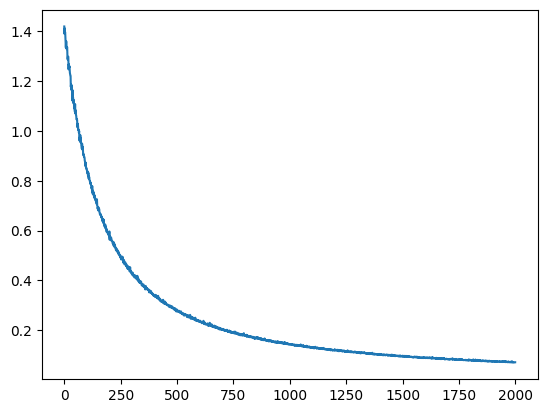

In [6]:
plt.plot(losses)

# Evaluate the model
Compute the confusion matrix on the train and test dataset and print out the accuracy and plot the confusion matrix.

Accuracy for class 0 = 100.0%
Accuracy for class 1 = 100.0%
Overall accuracy = 100.0%


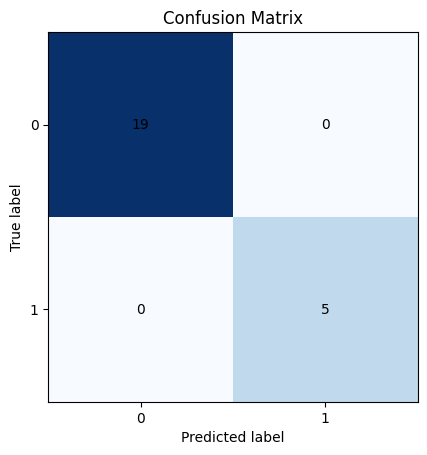

In [7]:
confusion_matrix = evaluate_model(model, test_dataset)

confusion_matrix.print_accuracy()

confusion_matrix.plot()

# Plot model weights and connections.
Plot the model weights and connections in order to attempt to interpret what the model is learning.

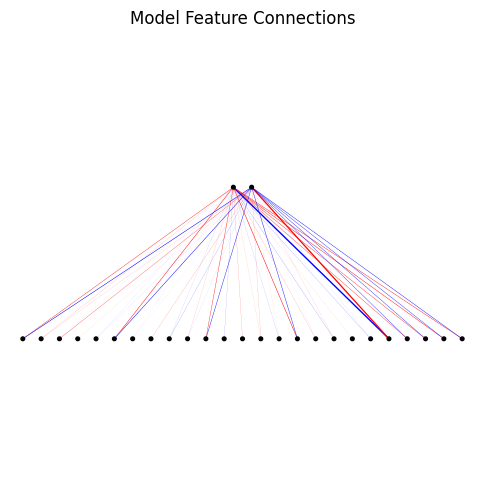

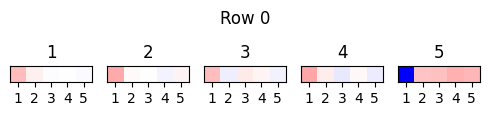

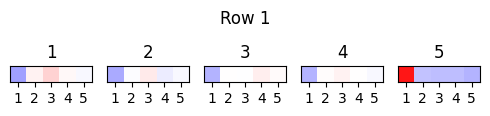

In [11]:
model.plot_connections()
model.plot_heatmap_feature(0,0)
model.plot_heatmap_feature(0,1)